220.2339
45.406270333495435
6.259279919108036e-11 masslossnew
[         0  315360000  946080000 1576800000 2522880000 3153600000
 4730400000]
1.3785056277768472e-11
[10.          9.99565274  9.98695823  9.97826372  9.96522196  9.95652745
  9.93479117]


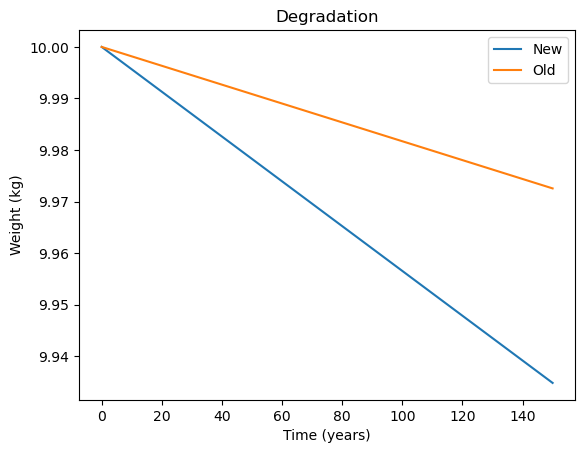

In [15]:
import math
import matplotlib.pyplot as plt
import numpy as np

material = "wood"
TemperatureOld = 25
TemperatureNew = 30
kg = 10

# validation of method https://www.fpl.fs.usda.gov/documnts/pdf2001/white01a.pdf
# https://www.e3s-conferences.org/articles/e3sconf/pdf/2021/56/e3sconf_icsf2021_07009.pdf
# A = 10000000000000 # preexponential factor, constant for small temperature changes such as 10 C https://www.chemguide.co.uk/physical/basicrates/arrhenius.html
R = 8.31446261815324 # Universal gas Constant J K-1 mol-1
TKelvinNew = TemperatureNew + 273.15
TKelvinOld = TemperatureOld + 273.15

def rateofdegradation():
    match material:
        # case "concrete":
        #     EActEnergy = 45.7 * 1000 # https://www.sciencedirect.com/science/article/pii/S0008884699002501
        #     # file:///D:/Downloads/104-m1120Methods20for20Calculating20Activation20Energy.pdf
        #     A = 10000000000000
        #     MassLossOld =  A * math.exp(-EActEnergy / (R * TKelvinOld)) # first-order Arrhenius equation, massloss/rateconstant mol^-1 s^-1
        #     MassLossNew =  A * math.exp(-EActEnergy / (R * TKelvinNew)) # first-order Arrhenius equation, massloss/rateconstant mol^-1 s^-1
        case "wood":
            #EActEnergy = 132.49 * 1000 # https://www.sciencedirect.com/science/article/abs/pii/S096085241931329X
            EActEnergy = 130 * 1000 # file:///D:/Downloads/Kinetic_analysis_of_thermal_degradation_of_Cedrela.pdf
            A = 1.57* (10**12) # 1.57* (10**12) # https://www.researchgate.net/publication/299646285_Modeling_of_the_pyrolysis_of_biomass_under_parabolic_and_exponential_temperature_increases_using_the_Distributed_Activation_Energy_Model
            MassLossOld =  A * math.exp(-EActEnergy / (R * TKelvinOld)) # first-order Arrhenius equation, massloss/rateconstant mol^-1 s^-1
            MassLossNew =  A * math.exp(-EActEnergy / (R * TKelvinNew)) # first-order Arrhenius equation, massloss/rateconstant mol^-1 s^-1
        # case "steel":
        #     EActEnergy = 150 * 1000 # https://www.researchgate.net/figure/Activation-energy-of-various-alloys-at-25-C_tbl5_51980089
        #     A = 10000000000000
        #     MassLossOld =  A * math.exp(-EActEnergy / (R * TKelvinOld)) # first-order Arrhenius equation, massloss/rateconstant mol^-1 s^-1
        #     MassLossNew =  A * math.exp(-EActEnergy / (R * TKelvinNew)) # first-order Arrhenius equation, massloss/rateconstant mol^-1 s^-1
    return MassLossOld, MassLossNew

MassLoss = rateofdegradation()
MassLossOld = MassLoss[0]
MassLossNew = MassLoss[1]

match material:
    case "concrete":
        molarmass = 29.300 # gram/mole https://www.sciencedirect.com/science/article/abs/pii/S0950061819334373#:~:text=At%20fixed%20dosage%2C%20spread%20values,more%20significant%20at%20high%20dosage.
    case "wood":
        molarmass = 220.2339 # gram/mole C6H12O6 + Ca https://www.plantchicago.org/post/thinking-circular-with-chemistry#:~:text=In%20actuality%20wood%20is%20mostly,formula%20is%3A%20C6H12O6%20%2B%20Ca.
    case "steel":
        molarmass = 55.845 # gram/mole https://sciencing.com/calculate-weight-steel-5127389.html
print(molarmass)
gram = kg * 1000
mol = gram / molarmass
print(mol)

# total time needed for reduction mass to 0
totaltimeold = mol / MassLossOld
totaltime = mol / MassLossNew

# convertion from mol to kg
weight = (mol * molarmass) / 1000 # in kg
lossold = (MassLossOld * molarmass) / 1000
lossnew = (MassLossNew * molarmass) / 1000
print(MassLossNew, "masslossnew")

# seconds and years
time = np.array([0, 10, 30, 50, 80, 100, 150])
time_seconds = time.astype(np.int64) * 3600 * 24 * 365
time_years = time_seconds / (3600 * 24 * 365) # convert time to years

# forumlas for plotting
formulanew = (weight - ((lossnew) * (time_seconds.astype(np.int64))))
formulaold = (weight - ((lossold) * (time_seconds.astype(np.int64))))
print(time_seconds)
print(lossnew)
print(formulanew)

x_max = np.max(time_seconds)
y_max = (np.max(formulanew) + (np.max(formulanew)*0.1))
y_min = np.max(formulanew)*0.9

fig, ax = plt.subplots()
ax.plot(time_years, formulanew, label='New')
ax.plot(time_years, formulaold, label='Old')
ax.set_title("Degradation")
ax.set_ylabel('Weight (kg)')
ax.set_xlabel('Time (years)')
# ax.set_ylim(y_min, y_max)  # Set x-axis limit from 0
# ax.set_xticks(time_years)  # Set x-axis ticks to the exact values of time_years
ax.legend()
plt.show()


# concrete pdf https://inis.iaea.org/collection/NCLCollectionStore/_Public/28/057/28057515.pdf

45.406270333495435
6.259279919108036e-11 masslossnew
[         0  315360000  946080000 1576800000 2522880000 3153600000
 4730400000]
1.3785056277768472e-11
[10.          9.99565274  9.98695823  9.97826372  9.96522196  9.95652745
  9.93479117]


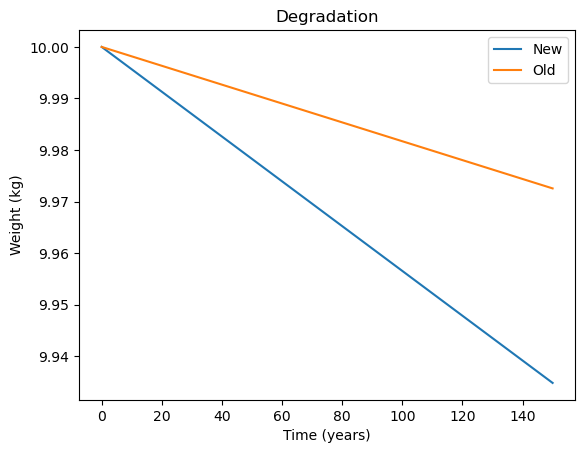

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

material = "wood"
TemperatureOld = 25
TemperatureNew = 30
kg = 10


match material:
    case "wood":
        # validation of method https://www.fpl.fs.usda.gov/documnts/pdf2001/white01a.pdf
        # https://www.e3s-conferences.org/articles/e3sconf/pdf/2021/56/e3sconf_icsf2021_07009.pdf
        # A = 10000000000000 # preexponential factor, constant for small temperature changes such as 10 C https://www.chemguide.co.uk/physical/basicrates/arrhenius.html
        R = 8.31446261815324 # Universal gas Constant J K-1 mol-1
        TKelvinNew = TemperatureNew + 273.15
        TKelvinOld = TemperatureOld + 273.15

        #EActEnergy = 132.49 * 1000 # https://www.sciencedirect.com/science/article/abs/pii/S096085241931329X
        EActEnergy = 130 * 1000 # file:///D:/Downloads/Kinetic_analysis_of_thermal_degradation_of_Cedrela.pdf
        A = 1.57* (10**12) # 1.57* (10**12) # https://www.researchgate.net/publication/299646285_Modeling_of_the_pyrolysis_of_biomass_under_parabolic_and_exponential_temperature_increases_using_the_Distributed_Activation_Energy_Model
        MassLossOld =  A * math.exp(-EActEnergy / (R * TKelvinOld)) # first-order Arrhenius equation, massloss/rateconstant mol^-1 s^-1
        MassLossNew =  A * math.exp(-EActEnergy / (R * TKelvinNew)) # first-order Arrhenius equation, massloss/rateconstant mol^-1 s^-1

        molarmass = 220.2339 # gram/mole C6H12O6 + Ca https://www.plantchicago.org/post/thinking-circular-with-chemistry#:~:text=In%20actuality%20wood%20is%20mostly,formula%20is%3A%20C6H12O6%20%2B%20Ca.

        gram = kg * 1000
        mol = gram / molarmass
        print(mol)

        # total time needed for reduction mass to 0
        totaltimeold = mol / MassLossOld
        totaltime = mol / MassLossNew

        # convertion from mol to kg
        weight = (mol * molarmass) / 1000 # in kg
        lossold = (MassLossOld * molarmass) / 1000
        lossnew = (MassLossNew * molarmass) / 1000
        print(MassLossNew, "masslossnew")

        # seconds and years
        time = np.array([0, 10, 30, 50, 80, 100, 150])
        time_seconds = time.astype(np.int64) * 3600 * 24 * 365
        time_years = time_seconds / (3600 * 24 * 365) # convert time to years

        # forumlas for plotting
        formulanew = (weight - ((lossnew) * (time_seconds.astype(np.int64))))
        formulaold = (weight - ((lossold) * (time_seconds.astype(np.int64))))
        print(time_seconds)
        print(lossnew)
        print(formulanew)

        x_max = np.max(time_seconds)
        y_max = (np.max(formulanew) + (np.max(formulanew)*0.1))
        y_min = np.max(formulanew)*0.9

        fig, ax = plt.subplots()
        ax.plot(time_years, formulanew, label='New')
        ax.plot(time_years, formulaold, label='Old')
        ax.set_title("Degradation")
        ax.set_ylabel('Weight (kg)')
        ax.set_xlabel('Time (years)')
        # ax.set_ylim(y_min, y_max)  # Set x-axis limit from 0
        # ax.set_xticks(time_years)  # Set x-axis ticks to the exact values of time_years
        ax.legend()
        plt.show()


# concrete pdf https://inis.iaea.org/collection/NCLCollectionStore/_Public/28/057/28057515.pdf